In [270]:
using Plots

# Laboratory 5: Netwon Method and Backtracking

In [271]:
module NewtonOptimizers
using LinearAlgebra
function newton_method(x0, f, gradf, hessf, kmax, tollgrad, alpha)
    k = 1
    xk = x0
    xseq = Vector{typeof(x0)}()
    gradfk = gradf(xk)
    push!(xseq, xk)
    
    while k < kmax
        if norm(gradfk) < tollgrad
            break
        end
        
        pk = hessf(xk) \ -gradfk
        
        xk = xk + alpha * pk
        k = k + 1
        gradfk = gradf(xk)
        push!(xseq, xk)
    end
    
    return xk, f(xk), gradfk, k, xseq
end

function newton_method_backtrack(x0, f, gradf, hessf, kmax, tollgrad, alpha0, c1, rho, btmax)
    k = 1
    xk = x0
    xseq = Vector{typeof(x0)}()
    btseq = Vector{Int}()
    gradfk = gradf(xk)
    push!(xseq, xk)
    
    while k < kmax
        if norm(gradfk) < tollgrad
            break
        end
        
        pk = hessf(xk) \ -gradfk
        
        # Backtracking
        alpha = alpha0
        bt = 1
        while f(xk + alpha * pk) > (f(xk) + c1 * alpha * gradf(xk)'*pk) && bt < btmax
            alpha = rho * alpha
            bt = bt + 1
        end
        push!(btseq, bt)
        
        xk = xk + alpha * pk
        k = k + 1
        gradfk = gradf(xk)
        push!(xseq, xk)
    end
    
    return xk, f(xk), gradfk, k, xseq, btseq
end



end

import Main.NewtonOptimizers
f1(x) = x[1]^2 + 4*x[2]^2 + 5
f2(x) = x[1]^4 + 4*x[2]^4 + 5
gradf1(x) = [2*x[1], 8*x[2]]
gradf2(x) = [4*x[1]^3, 16*x[2]^3]
hessf1(x) = [2 0; 0 8]
hessf2(x) = [12*x[1]^2 0; 0 48*x[2]^2]
kmax = 1000
tollgrad = 1e-12
x0 = [1.0, 1.0]
alpha = 1

1

## f1, no backtracking

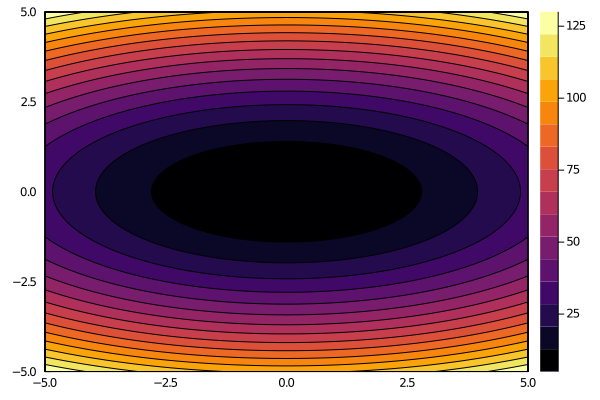

In [272]:
domain = range(-5, stop=5, length=100)
contourf(domain, domain, (x1,x2)->f1([x1,x2]))

In [273]:
NewtonOptimizers.newton_method(x0, f1, gradf1, hessf1, kmax, tollgrad, alpha)
xk, fk, gradfk, k, xseq = NewtonOptimizers.newton_method(x0, f1, gradf1, hessf1, kmax, tollgrad, alpha)
@show xk
@show fk
@show gradfk
@show k

xk = [0.0, 0.0]
fk = 5.0
gradfk = [0.0, 0.0]
k = 2


2

## f2, no backtracking

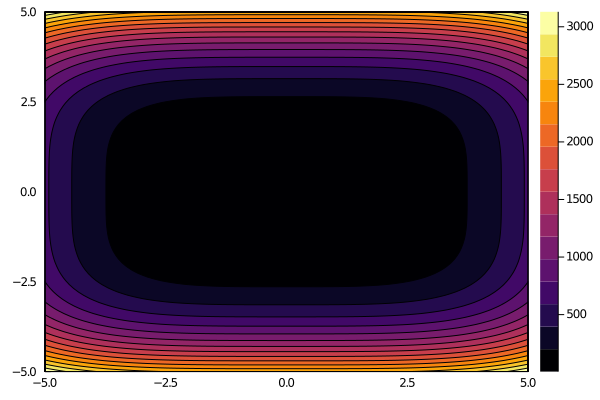

In [274]:
domain = range(-5, stop=5, length=100)
contourf(domain, domain, (x1,x2)->f2([x1,x2]))

In [275]:
xk, fk, gradfk, k, xseq = NewtonOptimizers.newton_method(x0, f2, gradf2, hessf2, kmax, tollgrad, alpha)
@show xk
@show fk
@show gradfk
@show k

xk = [2.640141869491072e-5, 2.640141869491072e-5]
fk = 5.0
gradfk = [7.361084192089297e-14, 2.9444336768357187e-13]
k = 27


27

## f1, with backtracking

In [276]:
alpha0 = 1.5
c1 = 1e-4
rho = 0.8
btmax = 50

50

In [277]:
xk, fk, gradfk, k, xseq, btseq = NewtonOptimizers.newton_method_backtrack(x0, f1, gradf1, hessf1, kmax, tollgrad, alpha0, c1, rho, btmax)
@show xk
@show fk
@show gradfk
@show k

xk = [-1.1368683772161603e-13, -1.1368683772161603e-13]
fk = 5.0
gradfk = [-2.2737367544323206e-13, -9.094947017729282e-13]
k = 44


44

## f2, with backtracking

In [278]:
xk, fk, gradfk, k, xseq, btseq = NewtonOptimizers.newton_method_backtrack(x0, f2, gradf2, hessf2, kmax, tollgrad, alpha0, c1, rho, btmax)
@show xk
@show fk
@show gradfk
@show k

xk = [3.0517578125e-5, 3.0517578125e-5]
fk = 5.0
gradfk = [1.1368683772161603e-13, 4.547473508864641e-13]
k = 16


16

## Comparing with steepest descent

In [279]:
module SteepestDescentOptimizers
using LinearAlgebra: norm

function backtrack(alpha0, rho, btmax, f, gradf, xk, c1, pk)
    bt = 0
    alpha = alpha0
    while bt < btmax && f(xk + alpha * pk) >= (f(xk) + c1 * alpha * gradf(xk)'*pk)
        alpha = rho * alpha
        bt = bt + 1
    end
    
    return (bt, alpha)
end

export steepest_descent_backtrack
function steepest_descent_backtrack(x0, f, gradf, alpha0, kmax, tollgrad, c1, rho, btmax)
    xseq = []
    btseq = []
    
    k = 0
    xk = x0
    
    while k < kmax && norm(gradf(xk)) > tollgrad
        k = k + 1
        push!(xseq, xk)
        
        pk = -gradf(xk)

        bt, alpha = backtrack(alpha0, rho, btmax, f, gradf, xk, c1, pk)
        push!(btseq, bt)
        
        xk = xk + alpha * pk
    end
    
    return (xk, f(xk), norm(gradf(xk)), k, xseq, btseq)
end

end

import Main.SteepestDescentOptimizers

### f1

xk = [-1.1368683772161603e-13, -1.1368683772161603e-13]
fk = 5.0
gradfk = [-2.2737367544323206e-13, -9.094947017729282e-13]
k = 44


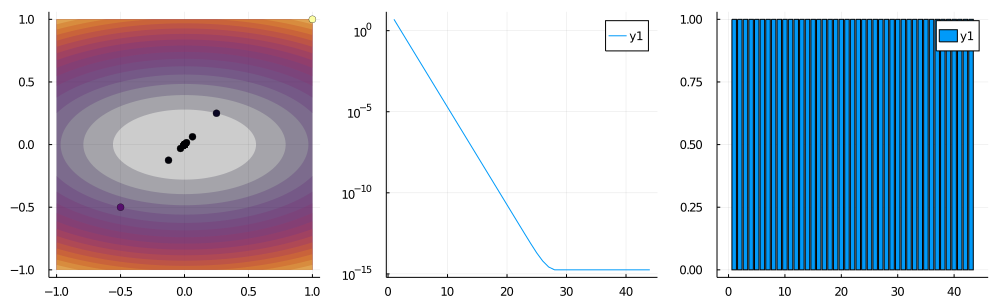

In [305]:
xk, fk, gradfk, k, xseq, btseq = NewtonOptimizers.newton_method_backtrack(x0, f1, gradf1, hessf1, kmax, tollgrad, alpha0, c1, rho, btmax)
@show xk
@show fk
@show gradfk
@show k
plot(
    begin
        domain = range(-1, stop=1, length=100)
        contourf(domain, domain, (x1,x2)->f1([x1,x2]),legend=false,c=cgrad(:inferno, alpha=0.2), linewidth=0)
        scatter!(map(x->x[1], xseq), map(x->x[2], xseq), markercolor=[get(cgrad(:inferno), (f1(xs)-5)/5) for xs in xseq], markerstrokewidth=0.5)
    end,
    plot(1:k, f1.(xseq) .- (5 - 10eps()), yaxis=:log),
    bar(btseq),
    layout=(1,3),
    size=(1000,300)
)

xk = [7.428764293581479e-10, 6.297050001346945e-9]
fk = 5.0
gradfk = 5.0398304927872835e-8
k = 1000


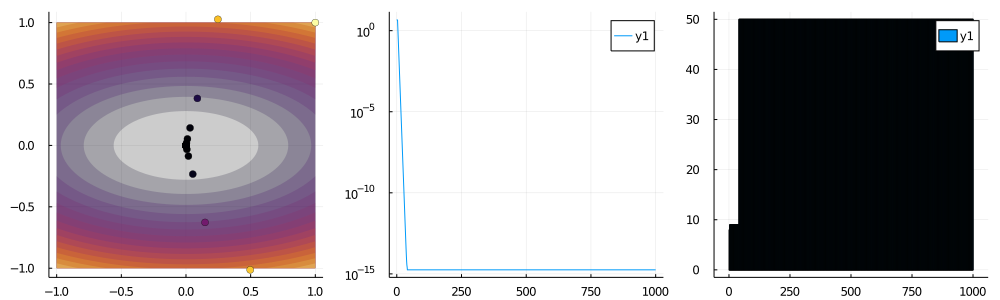

In [304]:
xk, fk, gradfk, k, xseq, btseq = SteepestDescentOptimizers.steepest_descent_backtrack(x0, f1, gradf1, alpha0, kmax, tollgrad, c1, rho, btmax)
@show xk
@show fk
@show gradfk
@show k
plot(
    begin
        domain = range(-1, stop=1, length=100)
        contourf(domain, domain, (x1,x2)->f1([x1,x2]),legend=false,c=cgrad(:inferno, alpha=0.2), linewidth=0)
        scatter!(map(x->x[1], xseq), map(x->x[2], xseq), markercolor=[get(cgrad(:inferno), (f1(xs)-5)/5) for xs in xseq], markerstrokewidth=0.5)
    end,
    plot(1:k, f1.(xseq) .- (5 - 10eps()), yaxis=:log),
    bar(btseq),
    layout=(1,3),
    size=(1000,300)
)

### f2

xk = [3.0517578125e-5, 3.0517578125e-5]
fk = 5.0
gradfk = [1.1368683772161603e-13, 4.547473508864641e-13]
k = 16


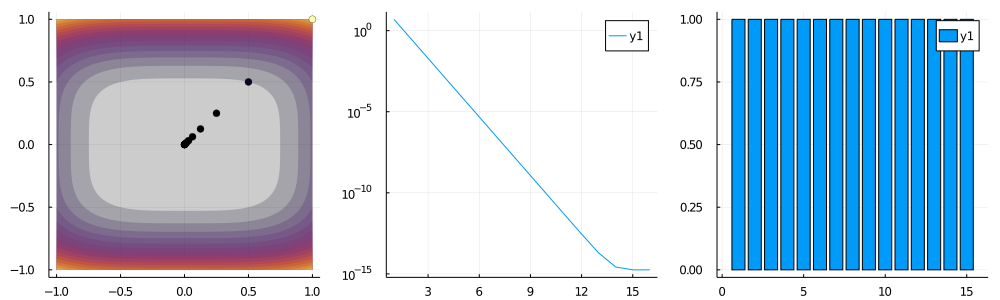

In [303]:
xk, fk, gradfk, k, xseq, btseq = NewtonOptimizers.newton_method_backtrack(x0, f2, gradf2, hessf2, kmax, tollgrad, alpha0, c1, rho, btmax)
@show xk
@show fk
@show gradfk
@show k
plot(
    begin
        domain = range(-1, stop=1, length=100)
        contourf(domain, domain, (x1,x2)->f2([x1,x2]),legend=false,c=cgrad(:inferno, alpha=0.2), linewidth=0)
        scatter!(map(x->x[1], xseq), map(x->x[2], xseq), markercolor=[get(cgrad(:inferno), (f2(xs)-5)/5) for xs in xseq], markerstrokewidth=0.5)
    end,
    plot(1:k, f2.(xseq) .- (5 - 10eps()), yaxis=:log),
    bar(btseq),
    layout=(1,3),
    size=(1000,300)
)

xk = [0.009117481953940342, 0.004560997237164385]
fk = 5.0000000086413525
gradfk = 3.390539620119283e-6
k = 1000


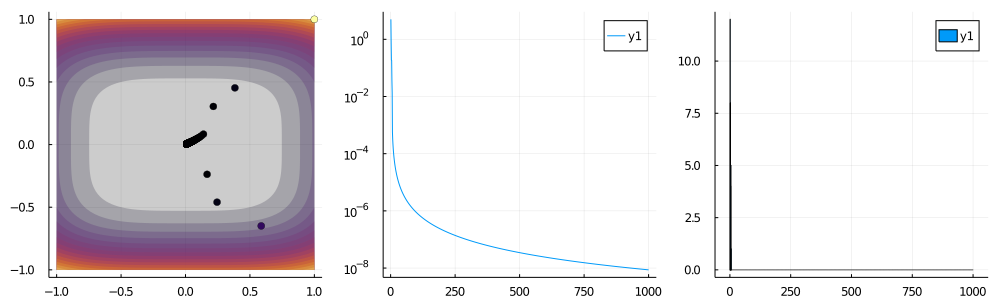

In [302]:
xk, fk, gradfk, k, xseq, btseq = SteepestDescentOptimizers.steepest_descent_backtrack(x0, f2, gradf2, alpha0, kmax, tollgrad, c1, rho, btmax)
@show xk
@show fk
@show gradfk
@show k
plot(
    begin
        domain = range(-1, stop=1, length=100)
        contourf(domain, domain, (x1,x2)->f2([x1,x2]),legend=false,c=cgrad(:inferno, alpha=0.2), linewidth=0)
        scatter!(map(x->x[1], xseq), map(x->x[2], xseq), markercolor=[get(cgrad(:inferno), (f2(xs)-5)/5) for xs in xseq], markerstrokewidth=0.5)
    end,
    plot(1:k, f2.(xseq) .- (5 - 10eps()), yaxis=:log),
    bar(btseq),
    layout=(1,3),
    size=(1000,300)
)